# Graphical representations

So far we have only looked at one variable at a time. In Two variables are related if knowing one gives you information about the other. For example, height and weight are related; people who are taller tend to be heavier. Of course, it is not a perfect relationship: there are short heavy people and tall light ones. But if you are trying to guess someone’s weight, you will be more accurate if you know their height than if you don’t.

Scatter plots provide a general impression of the relationship between variables, but there are other visualizations that provide more insight into the nature of the relation‐ship. One option is to bin one variable and plot percentiles of the other.

In statistical model, we generally have one variable that's the output and another one variable that's the input. We'll refer the output variable like the response variable noted with the letter *y*. On the other hand we have the explanatory variable noted with the letter *x*.

We put the response variable on vertical axis and the explanatory on horizontal axis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn style
sns.set()

In [2]:
"""Funciones especiales"""

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')

# importamos la función que necesitamos
#from DataManipulation import SampleRows
import DataManipulation as dm
from functions import ecdf

In [3]:
# DataFrame example
df = pd.read_csv('data/TSheightweight.csv', header=0, index_col=0)

# select five thousand of rows
sample = dm.SampleRows(df=df, nrows=5000)

In [30]:
# selecting values
height, weight = sample['htm3'], sample['wtkg2']

# preview of the data
df[['wtkg2', 'htm3']].head(10)

,wtkg2,htm3
0,70.91,157.0
1,72.73,163.0
3,73.64,170.0
4,88.64,185.0
5,109.09,183.0
6,50.00,157.0
7,122.73,178.0
8,90.00,178.0
9,77.27,173.0
10,63.64,170.0


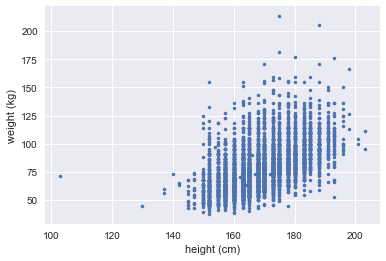

In [31]:
#plot the posible relationship between height and weight
plt.plot(height, weight, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

But this is not the best representation of the data, because the data are packed into columns. The problem is that the heights are rounded to the nearest inch, converted to centimeters, and then rounded again. Some information is lost in translation. We can’t get that information back, but *we can minimize* the effect on the scatter plot by **jittering** the data, which means adding *random noise* to reverse the effect of rounding off. Since these measurements were rounded to the nearest inch, they might be off by up to 0.5 inches or 1.3 cm. Similarly, the weights might be off by 0.5 kg.

In [73]:
# Jitter definition
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

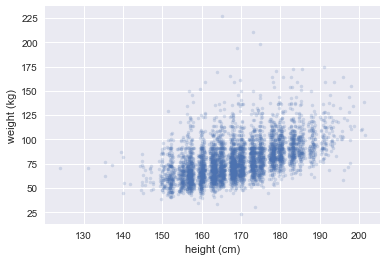

In [76]:
# jittering the data
height = Jitter(height)
weight = Jitter(weight)

# plot the new results
plt.plot(height, weight, marker='.', linestyle='none', alpha=0.2)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

To handle larger datasets, another option is a hexbin plot, which divides the graph into hexagonal bins and colors each bin according to how many data points fall in it.

/home/pablo/Programas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


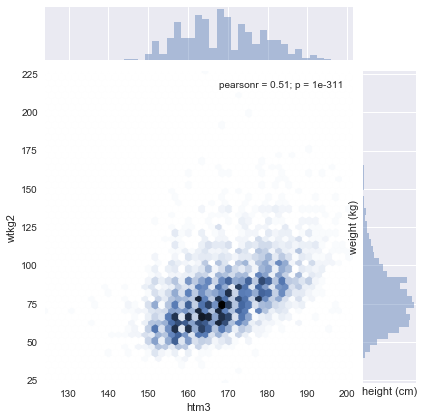

In [79]:
# hexbins
sns.jointplot(x=height, y=weight, kind='hex')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

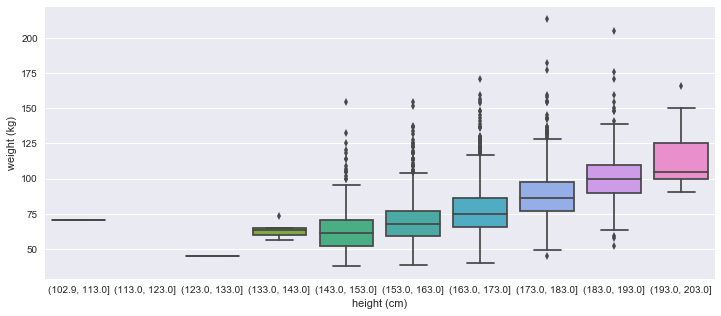

In [10]:
# boxplot

#figure
plt.figure(figsize=(12,5))

# draw the plot
sns.boxplot(y=weight, x=pd.cut(x=height, bins=10))
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

# Characterizing Relationships

## Characterizins bivariate relationships

* Form (linear, non-linear, quadratic, etc...)
* Direction (positive or negative)
* Strength (how much scatter/noise?)
* Outliers


Scatter plots provide a general impression of the relationship between variables, but there are other visualizations that provide more insight into the nature of the relation‐ship. One option is to bin one variable and plot percentiles of the other.

In [34]:
# drops rows with NaN values in any field
df = df.dropna(subset=['htm3', 'wtkg2'])

# Array of bins from 135 to 210 in increments of 5
bins = np.arange(135, 210, 5)

# computes the index of the bin that contains each value
indices = np.digitize(df.htm3, bins)

# DataFrame object groupby
groups = df.groupby(indices)
    
# for each group we can compute the mean height
heights = [group.htm3.mean() for i, group in groups]
    
# compute the CDF of weight
cdfs = [ecdf(group.wtkg2) for i, group in groups]

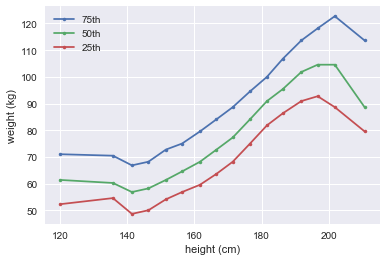

In [38]:
# figure plot
plt.figure(figsize=(10,6))

# percentiles
for percent in [75, 50, 25]:
    weights = [np.percentile(a=x, q=percent) for x, y in cdfs]
    label = '%dth' % percent
    plt.plot(heights, weights, label=label, marker='.')

# label the axis
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.legend()

# show the plot
plt.show()

Percentiles:  [  25 4974]


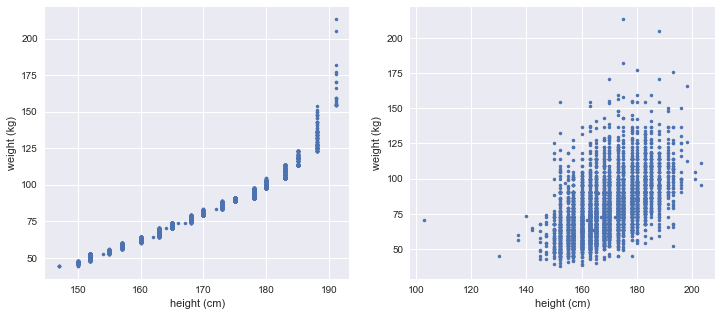

In [48]:
# assign indice to the data
indices = np.arange(0, len(sample))

# percentiles
percentiles = np.percentile(a=indices, q=[0.5, 99.5], interpolation='nearest')

#sorting data

# selecting the data
heights_no_outliers = sample['htm3'].sort_values()[percentiles[0]:percentiles[1]]
weights_no_outliers = sample['wtkg2'].sort_values()[percentiles[0]:percentiles[1]]

# info
print("Percentiles: ",percentiles)

# plot the result
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(heights_no_outliers, weights_no_outliers, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

plt.subplot(122)
plt.plot(height, weight, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

## Correlation

A **correlation** is a statistic intended to quantify the strength of the relationship between two variables.

A challenge in measuring correlation is that the variables we want to compare are often not expressed in the same units. And even if they are in the same units, they come from different distributions.

There are two common solutions to these problems:

* Transform each value to a **standard scores** which is the number of standard deviations from the mean. This transform leads to the *Pearson product-moment correlation coefficient*.
* Transform each value to its **rank**, which is its index in the sorted list of values. this transform leads to the *Spearman rank correlation coefficient*.

If X is a series of *n values*, $x_{i}$, we can convert to standard scores by subtracting the mean and dividing by the standard deviation

$$
z_{i} = \frac{x_{i} - \mu}{\sigma}
$$

The numerator is a deviation: the distance from the mean. Dividing by $\mu$ **standardizes** the deviation, so the values of Z are dimensionless (no units) and their distribution has mean 0 and variance 1.

If X is normally distributed, so is Z. But if X is skewed or has outliers, so does Z; in those cases, it is more robust  to use percentile ranks. If we compute a new variable, R, so that $r_{i}$ is the rank of $x_{i}$, the distribution of *R* is uniform from 1 to *n*, regardless of the distribution of X.